In [49]:
import numpy as np
import pandas as pd
import re
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import integrate

In [4]:
%load_ext autoreload
%autoreload 2

In [115]:
def print_cross_traffic_on_off(filename):
    with open(filename) as f:
        lines = f.readlines()
    on_count = 0; off_count = 0
    last_match_idx = 0
    for i, l in enumerate(lines):
        if l == 'background traffic is: off\n':
            off_count += 1
            print(lines[i-1], lines[i], end='')
            print("on count: {}, off count: {}".format(on_count, off_count))
            print("")
        if l == 'background traffic is: on\n':
            on_count += 1
            print(lines[i-1], lines[i], end='')
            print("on count: {}, off count: {}".format(on_count, off_count))
            print("")
                

In [84]:
def get_crosstraffic_mbits_sent(n_switches, rate):
    return n_switches * rate * 10

def get_total_avail_mbits(t_end, t_start, n_switches, bg_rate):
    return 240 * (t_end - t_start)  - get_crosstraffic_mbits_sent(n_switches, bg_rate)

In [109]:
def extract_time_and_throughput(filename):
    time = []; throughput = []
    with open(filename) as f:
        for line in f.readlines():
            m = re.search(r'timestamp: (\d+), average throughput: (\d+\.\d+) Mpbs', line)
            if m is not None:
                time.append(int(m.group(1)))
                throughput.append(float(m.group(2)))

#     return np.asarray(time), np.asarray(throughput)
    return np.stack([time, throughput], axis=1)
        

In [110]:
ctcp17 = extract_time_and_throughput('./datadumps/ctcp17.dump')
ctcp34 = extract_time_and_throughput('./datadumps/ctcp34.dump')
ctcp51 = extract_time_and_throughput('./datadumps/ctcp51.dump')
ctcp68 = extract_time_and_throughput('./datadumps/ctcp68.dump')

(2514, 2)

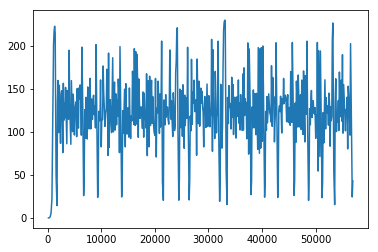

In [54]:
plt.plot(ctcp17[:500, 0], ctcp17[:500, 1])

In [111]:
ms_to_sec = lambda t: t / 1000.

def print_throughput_stats(tput_data, n_switches, bg_rate):
    t = ms_to_sec(tput_data[:, 0])
    th = tput_data[:, 1]
    dur = t[-1] - t[0]
    mbits_sent = integrate.trapz(th, t)
    avail_mbits = get_total_avail_mbits(t[-1], t[0], n_switches, bg_rate)
    print("Average throughput: {:.3f} Mbps".format(mbits_sent / dur))
    print("Average available bandwidth: {:.3f} Mbps".format(avail_mbits / dur))
    print("Utilization: {:2.2f}%".format(100. * mbits_sent / avail_mbits))

## CTCP 17

In [117]:
print_cross_traffic_on_off('./datadumps/ctcp17.dump')

Sending to 100.64.0.1:9090
 background traffic is: on
on count: 1, off count: 0

timestamp: 9892, average throughput: 160.169 Mpbs
 background traffic is: off
on count: 1, off count: 1

timestamp: 19890, average throughput: 99.3613 Mpbs
 background traffic is: on
on count: 2, off count: 1

timestamp: 29894, average throughput: 106.185 Mpbs
 background traffic is: off
on count: 2, off count: 2

timestamp: 39880, average throughput: 197.514 Mpbs
 background traffic is: on
on count: 3, off count: 2

timestamp: 49905, average throughput: 128.104 Mpbs
 background traffic is: off
on count: 3, off count: 3

timestamp: 59854, average throughput: 148.175 Mpbs
 background traffic is: on
on count: 4, off count: 3

timestamp: 69855, average throughput: 82.528 Mpbs
 background traffic is: off
on count: 4, off count: 4

timestamp: 79906, average throughput: 192.225 Mpbs
 background traffic is: on
on count: 5, off count: 4

timestamp: 89941, average throughput: 221.449 Mpbs
 background traffic is: of

In [118]:
ctcp17 = extract_time_and_throughput('./datadumps/ctcp17.dump')
print_throughput_stats(ctcp17, 15, 17)

Average throughput: 124.631 Mbps
Average available bandwidth: 231.018 Mbps
Utilization: 53.95%


## CTCP 34

In [119]:
print_cross_traffic_on_off('./datadumps/ctcp34.dump')

Sending to 100.64.0.1:9090
 background traffic is: on
on count: 1, off count: 0

timestamp: 9958, average throughput: 162.029 Mpbs
 background traffic is: off
on count: 1, off count: 1

timestamp: 19896, average throughput: 18.3907 Mpbs
 background traffic is: on
on count: 2, off count: 1

timestamp: 29942, average throughput: 129.765 Mpbs
 background traffic is: off
on count: 2, off count: 2

timestamp: 39834, average throughput: 87.4024 Mpbs
 background traffic is: on
on count: 3, off count: 2

timestamp: 49876, average throughput: 101.219 Mpbs
 background traffic is: off
on count: 3, off count: 3

timestamp: 59946, average throughput: 121.739 Mpbs
 background traffic is: on
on count: 4, off count: 3

timestamp: 69938, average throughput: 143.068 Mpbs
 background traffic is: off
on count: 4, off count: 4

timestamp: 79893, average throughput: 138.19 Mpbs
 background traffic is: on
on count: 5, off count: 4

timestamp: 89862, average throughput: 139.36 Mpbs
 background traffic is: off

In [120]:
ctcp34 = extract_time_and_throughput('./datadumps/ctcp34.dump')
print_throughput_stats(ctcp34, 8, 34)

Average throughput: 124.525 Mbps
Average available bandwidth: 222.623 Mbps
Utilization: 55.94%


## CTCP 51

In [123]:
print_cross_traffic_on_off('./datadumps/ctcp51.dump')

Sending to 100.64.0.1:9090
 background traffic is: on
on count: 1, off count: 0

timestamp: 9824, average throughput: 126.756 Mpbs
 background traffic is: off
on count: 1, off count: 1

timestamp: 19784, average throughput: 106.031 Mpbs
 background traffic is: on
on count: 2, off count: 1

timestamp: 29779, average throughput: 169.186 Mpbs
 background traffic is: off
on count: 2, off count: 2

timestamp: 39722, average throughput: 131.33 Mpbs
 background traffic is: on
on count: 3, off count: 2

timestamp: 49735, average throughput: 116.112 Mpbs
 background traffic is: off
on count: 3, off count: 3

timestamp: 59778, average throughput: 158.964 Mpbs
 background traffic is: on
on count: 4, off count: 3

timestamp: 69754, average throughput: 147.112 Mpbs
 background traffic is: off
on count: 4, off count: 4

timestamp: 79794, average throughput: 87.4334 Mpbs
 background traffic is: on
on count: 5, off count: 4

timestamp: 89803, average throughput: 117.633 Mpbs
 background traffic is: of

In [124]:
ctcp51 = extract_time_and_throughput('./datadumps/ctcp51.dump')
print_throughput_stats(ctcp51, 13, 51)

Average throughput: 122.458 Mbps
Average available bandwidth: 213.058 Mbps
Utilization: 57.48%


## CTCP 68

In [127]:
print_cross_traffic_on_off('./datadumps/ctcp68.dump')

Sending to 100.64.0.1:9090
 background traffic is: on
on count: 1, off count: 0

timestamp: 9936, average throughput: 104.597 Mpbs
 background traffic is: off
on count: 1, off count: 1

timestamp: 19879, average throughput: 89.6441 Mpbs
 background traffic is: on
on count: 2, off count: 1

timestamp: 29921, average throughput: 189.159 Mpbs
 background traffic is: off
on count: 2, off count: 2

timestamp: 39852, average throughput: 123.413 Mpbs
 background traffic is: on
on count: 3, off count: 2

timestamp: 49898, average throughput: 130.021 Mpbs
 background traffic is: off
on count: 3, off count: 3

timestamp: 59865, average throughput: 125.95 Mpbs
 background traffic is: on
on count: 4, off count: 3

timestamp: 69842, average throughput: 130.041 Mpbs
 background traffic is: off
on count: 4, off count: 4

timestamp: 79867, average throughput: 140.79 Mpbs
 background traffic is: on
on count: 5, off count: 4

timestamp: 82463, average throughput: 191.865 Mpbs
 background traffic is: off

In [128]:
ctcp68 = extract_time_and_throughput('./datadumps/ctcp68.dump')
print_throughput_stats(ctcp68, 5, 68)

Average throughput: 118.309 Mbps
Average available bandwidth: 198.687 Mbps
Utilization: 59.55%


231.01809062218211